In [1]:
import numpy as np
from numpy import abs, sqrt, log10, sin, cos, exp, cosh, tanh, log, conj, cosh, sinh
np.set_printoptions(precision=16)
from math import pi, factorial
from numpy.random import rand
from numpy.linalg import norm
import scipy
import scipy.sparse as sp
from scipy.sparse import linalg, csc_matrix
import time
from scipy.optimize import minimize
from scipy.special import eval_hermite

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
#mpl.rcParams["figure.dpi"] = 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import pickle

In [2]:
N_p_list = np.arange(20, 120, 20) # Number of photons threshold list
d_list = np.arange(1, 6, 1) # Number of layers list

[0.0449785051589386 0.017464547078129  0.017461754712325
 0.0172062718267005 0.0152014398511817]
[0.0243743589117067 0.0045745939456665 0.0045745713432216
 0.0042270683690039 0.0041973137403913]
[0.0165946712700509 0.0020893226753379 0.0020892078762662
 0.0020892012086618 0.0020294159596013]
[0.0124963921008788 0.0011950941629203 0.0011950941616814
 0.0011950941120345 0.0011944335457278]
[0.0100050393532201 0.0007736864626246 0.0007736864626159
 0.0007736864626109 0.0007736864625852]


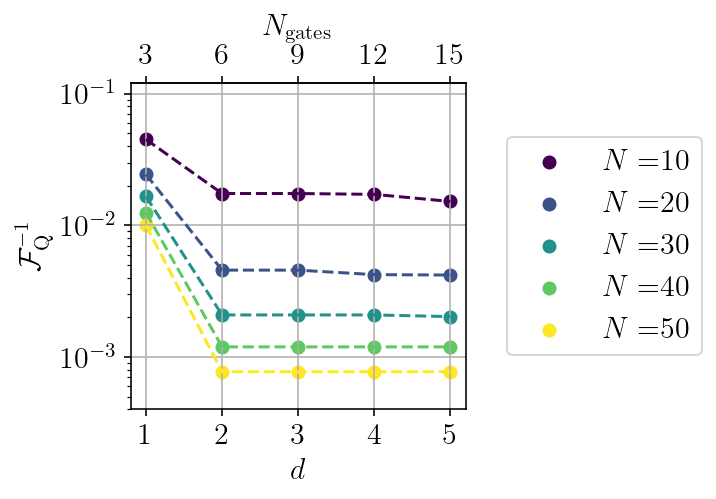

In [12]:
plt.rcParams["figure.figsize"] = [3, 3]
fig, ax = plt.subplots(1, 1)
colors = plt.cm.viridis(np.linspace(0, 1, len(N_p_list)))
ax.grid()

i = 0 # Initialize count

for N_p in N_p_list:

    # Emitters ansatz
    with open("cost_p_scaling_emitters_coherent_N_threshold_N={:}.p".format(N_p), 'rb') as fp:
        cost_preparation_list = pickle.load(fp)

    d_list = np.linspace(1, len(cost_preparation_list), len(cost_preparation_list)) # Number of layers list
    
    ax.scatter(d_list, -1/np.array(cost_preparation_list), color=colors[i], label='$N=${:}'.format(int(N_p/2)))
    ax.plot(d_list, -1/np.array(cost_preparation_list), '--', color=colors[i])

    i += 1 # Count

fs = 15 # Font size for the figure

ax.set_ylim([4e-4, 1.2e-1])
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_yscale('log')
ax.set_xlabel(r'$d$',fontsize=fs)
ax.set_ylabel(r'$\mathcal{F}^{-1}_{\rm Q}$',fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)
ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), fontsize=fs)

# Equivalence between number of gates and layers to plot secondary axis
def layers_to_gates_emitters(x):
    return 3*x
def gates_to_layers_emitters(x):
    return x/3

secax = ax.secondary_xaxis('top', functions=(layers_to_gates_emitters, gates_to_layers_emitters))
secax.set_xlabel(r'$N_{\rm gates}$', fontsize=fs)
secax.set_xticks(3*d_list)
secax.tick_params(axis='both', labelsize=fs)